In [1]:
%pip install pandas seaborn scikit-learn

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, SpectralEmbedding
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [7]:
def apply_reduction(method, **kwargs):
  model = method(**kwargs)
  X_reduced = model.fit_transform(X_normalized)
  return X_reduced

# Applying each technique
lle = apply_reduction(LocallyLinearEmbedding, n_neighbors=200, n_components=2, random_state=0)
tsne = apply_reduction(TSNE, n_components=2, perplexity=50, random_state=0)
isomap = apply_reduction(Isomap, n_neighbors=200, n_components=2)
laplacian = apply_reduction(SpectralEmbedding, n_neighbors=200, n_components=2)
kernel_pca = apply_reduction(KernelPCA, kernel='rbf', gamma=0.01, n_components=2)
pca = apply_reduction(PCA, n_components=2)

<ipython-input-9-c026abb3d0c5>:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


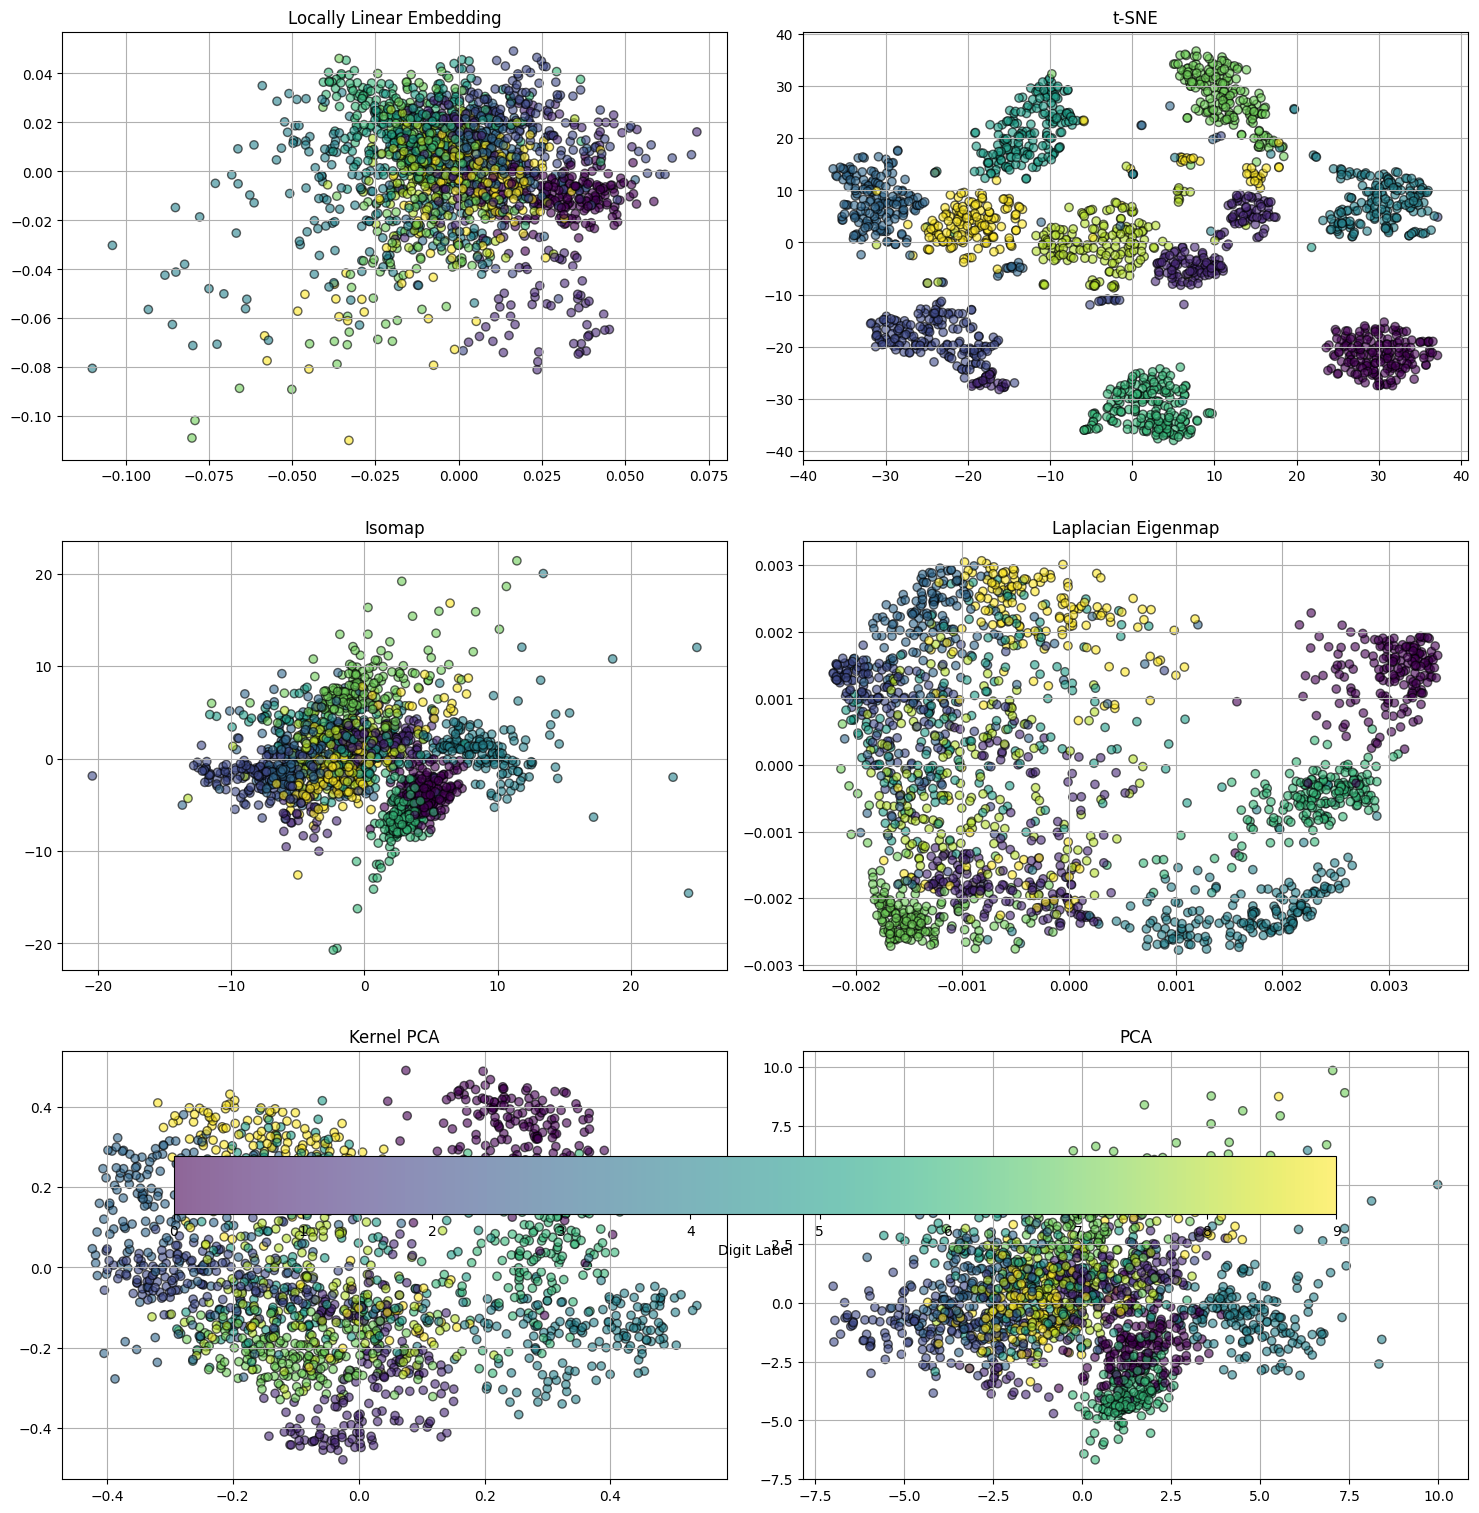

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
techniques = [lle, tsne, isomap, laplacian, kernel_pca, pca]
titles = ['Locally Linear Embedding', 't-SNE', 'Isomap', 'Laplacian Eigenmap', 'Kernel PCA', 'PCA']

for ax, data, title in zip(axs.ravel(), techniques, titles):
  scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.6)
  ax.set_title(title)
  ax.grid(True)

fig.colorbar(scatter, ax=axs.ravel().tolist(), orientation='horizontal', label='Digit Label')
plt.tight_layout()
plt.show()